<a href="https://colab.research.google.com/github/Ariepramudya01/Classification-Clustering-of-Mature-Papaya/blob/main/BPNN_Heart_Desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_url = "/content/drive/MyDrive/Classification Heart Desease Using BPNN"

In [ ]:
import os

dataset_path = os.path.join(base_url, "heart.csv")

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv(dataset_path)

In [ ]:
dataset.head().T

,0,1,2,3,4
age,52.0,53.0,70.0,61.0,62.0
sex,1.0,1.0,1.0,1.0,0.0
cp,0.0,0.0,0.0,0.0,0.0
trestbps,125.0,140.0,145.0,148.0,138.0
chol,212.0,203.0,174.0,203.0,294.0
fbs,0.0,1.0,0.0,0.0,1.0
restecg,1.0,0.0,1.0,1.0,1.0
thalach,168.0,155.0,125.0,161.0,106.0
exang,0.0,1.0,1.0,0.0,0.0
oldpeak,1.0,3.1,2.6,0.0,1.9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Check for null values in the entire DataFrame
null_counts = dataset.isnull().sum()

# Print the count of null values for each column
print("Null Value Counts:")
print(null_counts)

# Check if there are any null values in the DataFrame
if null_counts.sum() > 0:
    print("\nThere are null values in the dataset.")
else:
    print("\nThere are no null values in the dataset.")


Null Value Counts:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the dataset.


Class Distribution:
target
1    526
0    499
Name: count, dtype: int64


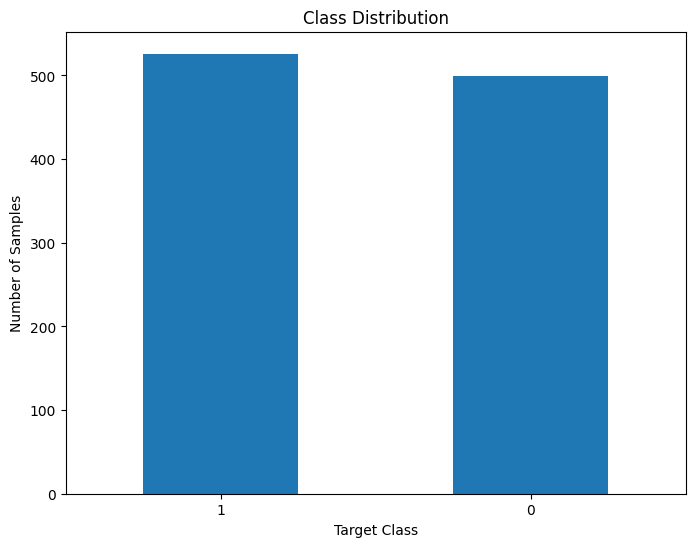

In [ ]:
import matplotlib.pyplot as plt

#cek keseimbangan dataset kelas
class_counts = dataset['target'].value_counts()

print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

Class Distribution Before Balancing:
target
1    526
0    499
Name: count, dtype: int64


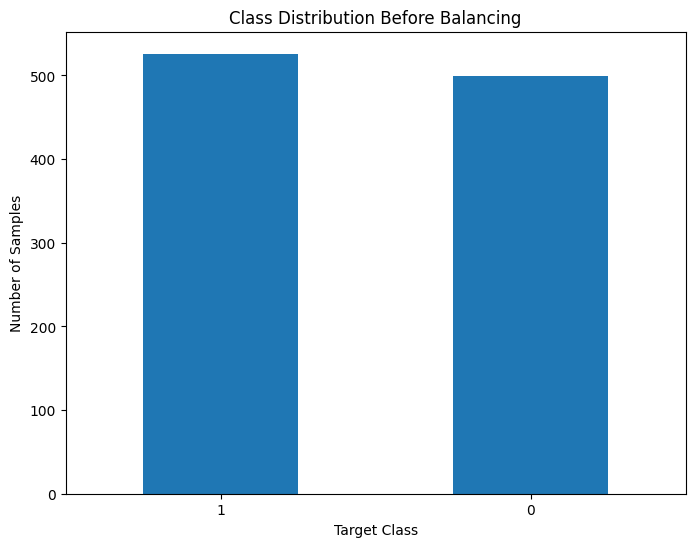


Class Distribution After Balancing:
target
0    526
1    526
Name: count, dtype: int64


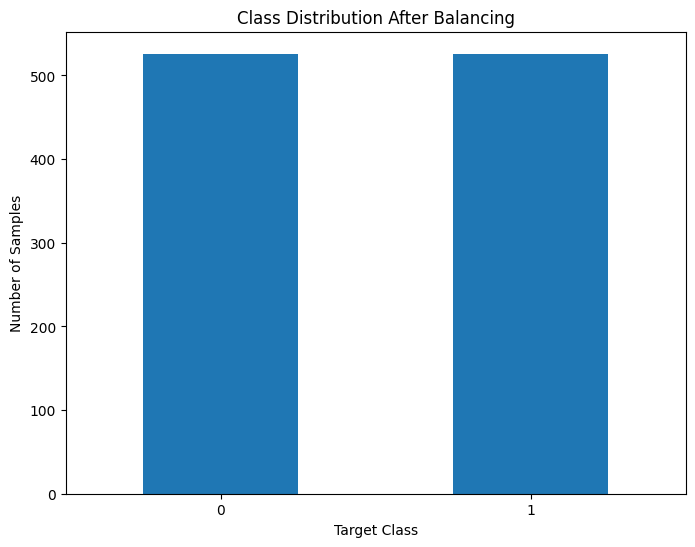

In [ ]:
from imblearn.over_sampling import SMOTE

#cek keseimbangan dataset kelas
class_counts = dataset['target'].value_counts()

print("Class Distribution Before Balancing:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

# Separate features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_dataset = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

# Check the class distribution after balancing
balanced_class_counts = balanced_dataset['target'].value_counts()

print("\nClass Distribution After Balancing:")
print(balanced_class_counts)

# Visualize the class distribution after balancing
plt.figure(figsize=(8, 6))
balanced_class_counts.plot(kind='bar')
plt.title('Class Distribution After Balancing')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Separate features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("X example:\n",X.head())
print("y example:\n", y.head())


Shape of X: (1025, 13)
Shape of y: (1025,)
X example:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
y example:
 0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Information Gain:
     Feature  Information Gain
4       chol          0.278200
7    thalach          0.154356
9    oldpeak          0.134537
2         cp          0.134029
12      thal          0.133364
11        ca          0.125128
8      exang          0.089545
3   trestbps          0.079952
10     slope          0.054125
0        age          0.053520
1        sex          0.032636
6    restecg          0.013306
5        fbs          0.000000


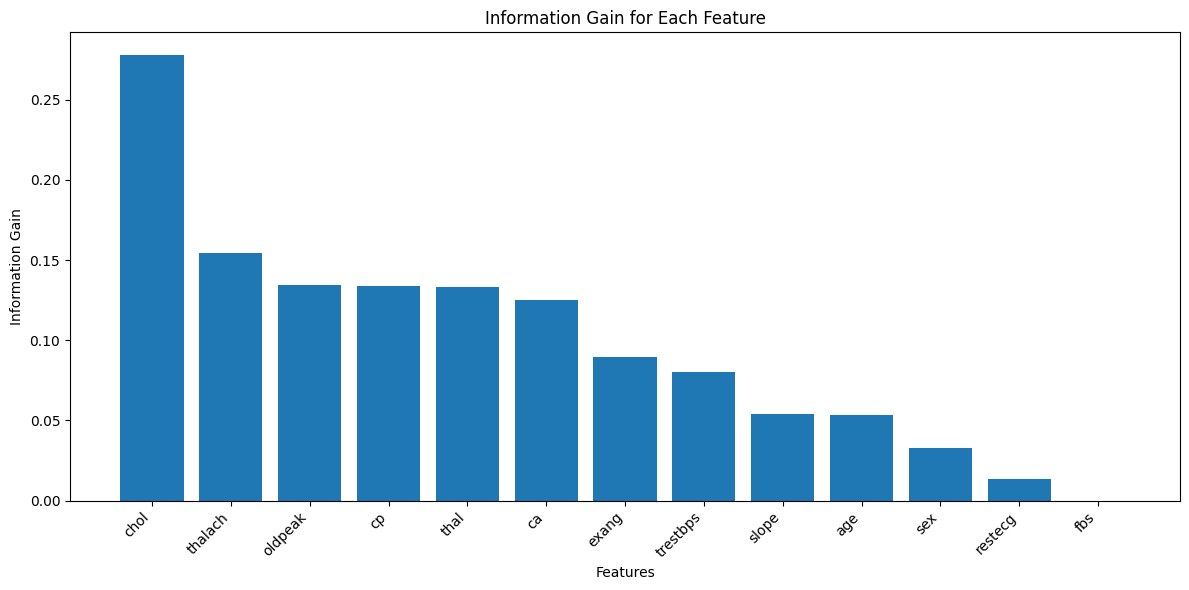


Selected Features:
['chol', 'thalach', 'oldpeak', 'cp', 'thal', 'ca', 'exang', 'trestbps', 'slope', 'age']

Shape of X_selected: (1052, 10)
X_selected example:
    chol  thalach  oldpeak  cp  thal  ca  exang  trestbps  slope  age
0   212      168      1.0   0     3   2      0       125      2   52
1   203      155      3.1   0     3   0      1       140      0   53
2   174      125      2.6   0     3   0      1       145      0   70
3   203      161      0.0   0     3   1      0       148      2   61
4   294      106      1.9   0     2   3      0       138      1   62


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calculate Information Gain
information_gain = mutual_info_classif(X_resampled, y_resampled, random_state=42)

# Create a DataFrame to display Information Gain scores
information_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})

# Sort the DataFrame by Information Gain in descending order
information_gain_df = information_gain_df.sort_values('Information Gain', ascending=False)

# Print the Information Gain scores
print("Information Gain:")
print(information_gain_df)

# Visualize Information Gain
plt.figure(figsize=(12, 6))
plt.bar(information_gain_df['Feature'], information_gain_df['Information Gain'])
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain for Each Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select top k features based on Information Gain (e.g., top 5)
k = 10
selected_features = information_gain_df['Feature'][:k].tolist()

# Create new data set with only selected features
X_selected = X_resampled[selected_features]

print("\nSelected Features:")
print(selected_features)
print("\nShape of X_selected:", X_selected.shape)
print("X_selected example:\n",X_selected.head())

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected features and transform the data
X_scaled = scaler.fit_transform(X_selected)

# Convert the scaled data back to a DataFrame (optional, for easier viewing)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("\nSelected Features:")
print(selected_features)
print("\nShape of X_selected:", X_selected.shape)
print("\nX_selected example:\n",X_selected.head())
print("\nShape of X_scaled:", X_scaled.shape)
print("\nX_scaled_df example:\n", X_scaled_df.head())


Selected Features:
['chol', 'thalach', 'oldpeak', 'cp', 'thal', 'ca', 'exang', 'trestbps', 'slope', 'age']

Shape of X_selected: (1052, 10)

X_selected example:
    chol  thalach  oldpeak  cp  thal  ca  exang  trestbps  slope  age
0   212      168      1.0   0     3   2      0       125      2   52
1   203      155      3.1   0     3   0      1       140      0   53
2   174      125      2.6   0     3   0      1       145      0   70
3   203      161      0.0   0     3   1      0       148      2   61
4   294      106      1.9   0     2   3      0       138      1   62

Shape of X_scaled: (1052, 10)

X_scaled_df example:
        chol   thalach   oldpeak        cp      thal        ca     exang  \
0 -0.661316  0.834914 -0.070667 -0.902882  1.078027  1.192779 -0.715188   
1 -0.835936  0.268615  1.720533 -0.902882  1.078027 -0.742153  1.398233   
2 -1.398599 -1.038229  1.294057 -0.902882  1.078027 -0.742153  1.398233   
3 -0.835936  0.529984 -0.923620 -0.902882  1.078027  0.225313 -0.7151

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (946, 10)
X_test shape: (106, 10)
y_train shape: (946,)
y_test shape: (106,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class BPNNModel(tf.keras.Model):
    def __init__(self, input_dim):
        super(BPNNModel, self).__init__()

        # Define the model architecture
        self.model = Sequential([
            Dense(16, activation='relu', input_dim=input_dim, name='hidden1'),
            Dense(8, activation='relu', name='hidden2'),
            Dense(1, activation='sigmoid', name='output')
        ])

        # Compile the model
        self.model.compile(
            optimizer=Adam(learning_rate=0.01),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

    def forward_pass(self, inputs):
        """
        Forward propagation
        Args:
            inputs: Input data
        Returns:
            Model predictions and layer outputs
        """
        layer_outputs = []
        x = inputs

        # Get output of each layer
        for layer in self.model.layers:
            x = layer(x)
            layer_outputs.append(x)

        return layer_outputs

    def backward_pass(self, inputs, targets):
        """
        Backward propagation
        Args:
            inputs: Input data
            targets: Target values
        Returns:
            Loss value and gradients
        """
        with tf.GradientTape() as tape:
            # Forward pass to get predictions
            predictions = self.model(inputs)

            # Calculate loss
            loss = tf.keras.losses.binary_crossentropy(targets, predictions)

        # Calculate gradients
        gradients = tape.gradient(loss, self.model.trainable_variables)

        # Update weights
        self.model.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

        return loss, gradients

    def train_step(self, inputs, targets):
        """
        Single training step with forward and backward propagation
        """
        # Forward propagation
        layer_outputs = self.forward_pass(inputs)

        # Backward propagation
        loss, gradients = self.backward_pass(inputs, targets)

        return loss, layer_outputs

    def get_summary(self):
        """Display model summary"""
        return self.model.summary()

# Create and display the model
input_dim = X_train.shape[1]  # Adjust according to your input features
model = BPNNModel(input_dim)

# Display model summary
print("\nModel Summary:")
model.get_summary()


Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                      │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
epochs = 50  # Number of epochs (iterations over the training data)
batch_size = 32 # Batch size for training

history = model.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7345 - loss: 0.5430 - val_accuracy: 0.7684 - val_loss: 0.4933
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8471 - loss: 0.3561 - val_accuracy: 0.7895 - val_loss: 0.4546
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8610 - loss: 0.3312 - val_accuracy: 0.8000 - val_loss: 0.4274
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8856 - loss: 0.3008 - val_accuracy: 0.8421 - val_loss: 0.3919
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8914 - loss: 0.2778 - val_accuracy: 0.8421 - val_loss: 0.3608
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9102 - loss: 0.2415 - val_accuracy: 0.8526 - val_loss: 0.3392
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9061 - loss: 0.2527 - val_accuracy: 0.8842 - val_loss: 0.3173
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9350 - loss: 0.1940 - val_accuracy: 0.9158 - val_los

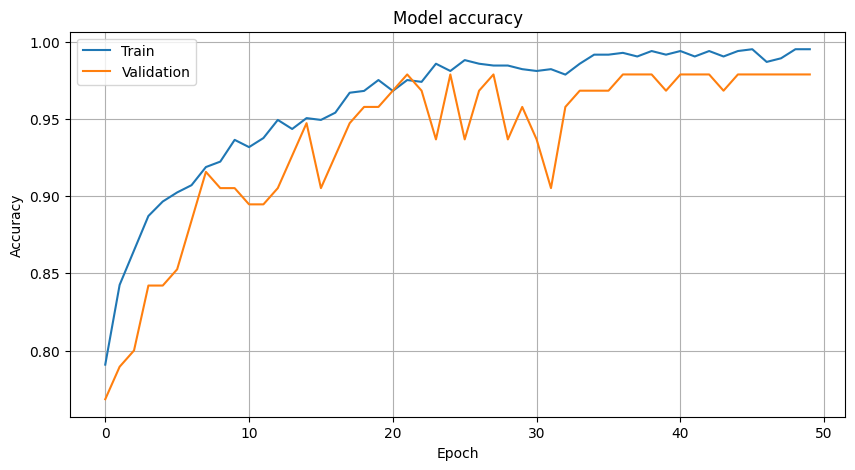

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

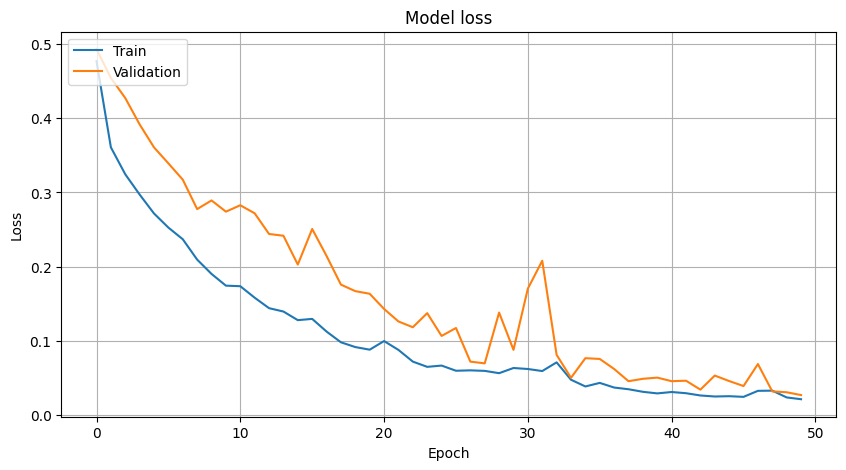

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# prompt: hitung akurasinya aja pada kelas 0 dan 1

from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = (model.model.predict(X_test) > 0.5).astype("int32")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract accuracy for class 0 and class 1
accuracy_class_0 = cm[0, 0] / cm[0].sum()
accuracy_class_1 = cm[1, 1] / cm[1].sum()

print(f"Accuracy for class 0: {accuracy_class_0}")
print(f"Accuracy for class 1: {accuracy_class_1}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy for class 0: 1.0
Accuracy for class 1: 1.0


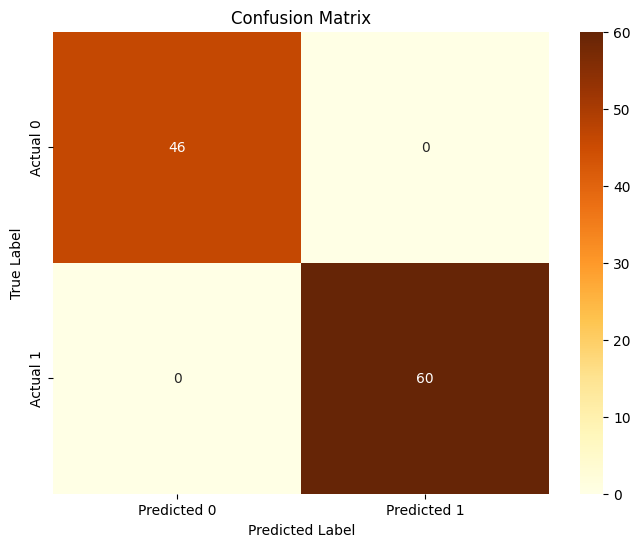

In [ ]:
import seaborn as sns

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


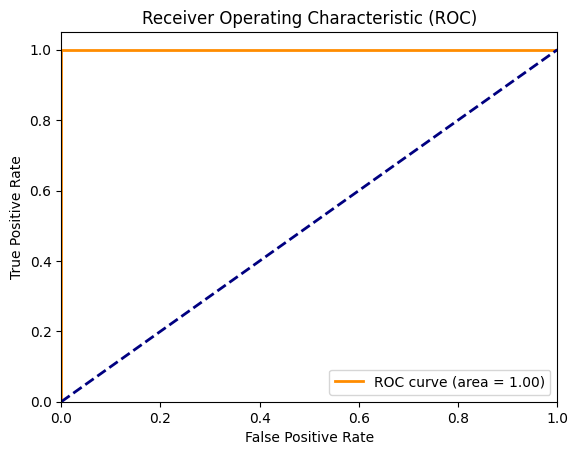

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#If you only have y_pred, you need to get probabilities
y_pred_probabilities = model.model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

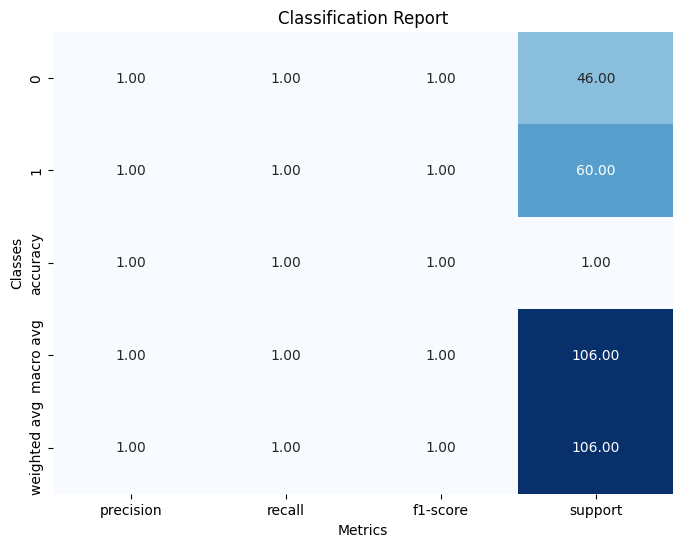

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined from your previous code
# Make predictions on the test set if not already done
# y_pred = (model.model.predict(X_test) > 0.5).astype("int32")

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()